<a href="https://colab.research.google.com/github/sajidhali/CodeWay1/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/fraudTrain.csv.zip")
test = pd.read_csv("/content/drive/MyDrive/fraudTest.csv.zip")

data = pd.concat([train,test])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [ ]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [ ]:
label_encoder = {}

label_encoder_cols = ['merchant','category','gender','state','job']
for col in label_encoder_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoder[col] = le

  train[col] = le.fit_transform(train[col])
  label_encoder[col] = le

  test[col] = le.fit_transform(test[col])
  label_encoder[col] = le


<ipython-input-39-acab1f5da177>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=data.corr()


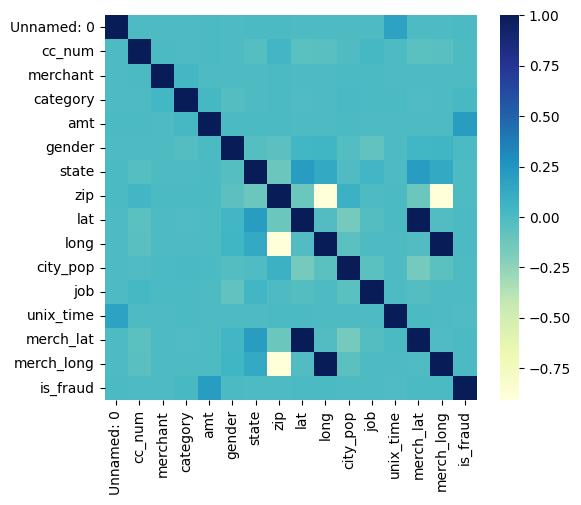

<Figure size 640x480 with 0 Axes>

In [ ]:
# correlation heatmap
corrMatrix=data.corr()
sns.heatmap(data=corrMatrix, annot=False , cmap="YlGnBu")
plt.gcf().set_size_inches(6, 5)
plt.figure()
plt.show()

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/fraudTrain.csv.zip")
df_test = pd.read_csv("/content/drive/MyDrive/fraudTest.csv.zip")

df = pd.concat([df_train,df_test])

<function matplotlib.pyplot.show(close=None, block=None)>

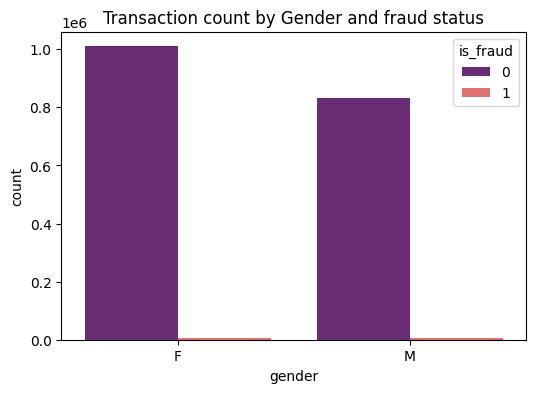

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender',data=df,hue='is_fraud',palette='magma')
plt.title('Transaction count by Gender and fraud status')
plt.show

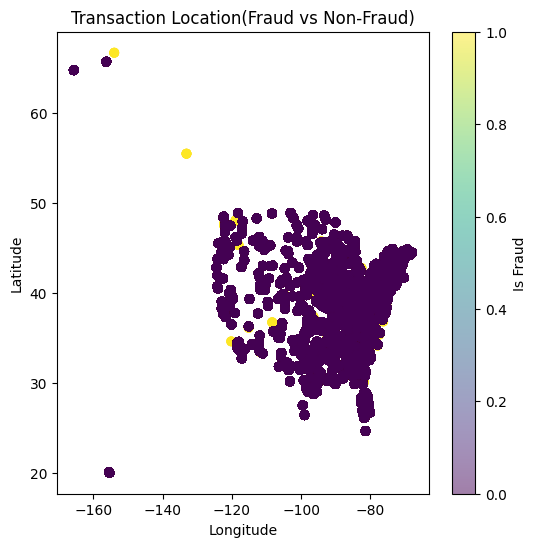

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['long'],df['lat'],alpha=0.5,c=df['is_fraud'],cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Transaction Location(Fraud vs Non-Fraud)')
plt.colorbar(label='Is Fraud')
plt.show()

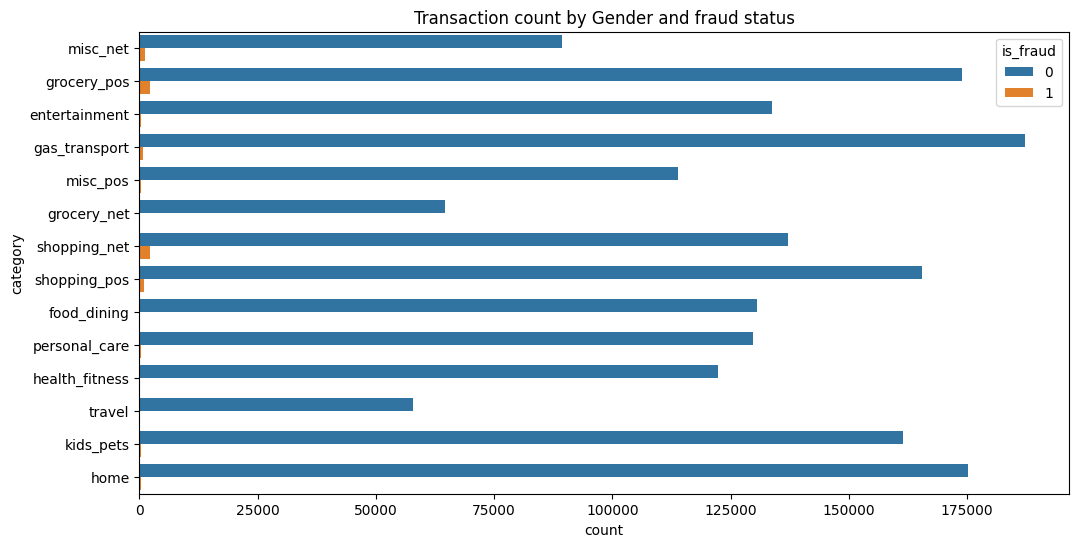

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='category',data=df,hue='is_fraud')
plt.title('Transaction count by Gender and fraud status')
plt.show()

<ipython-input-31-8eab7b4c55df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Blues')


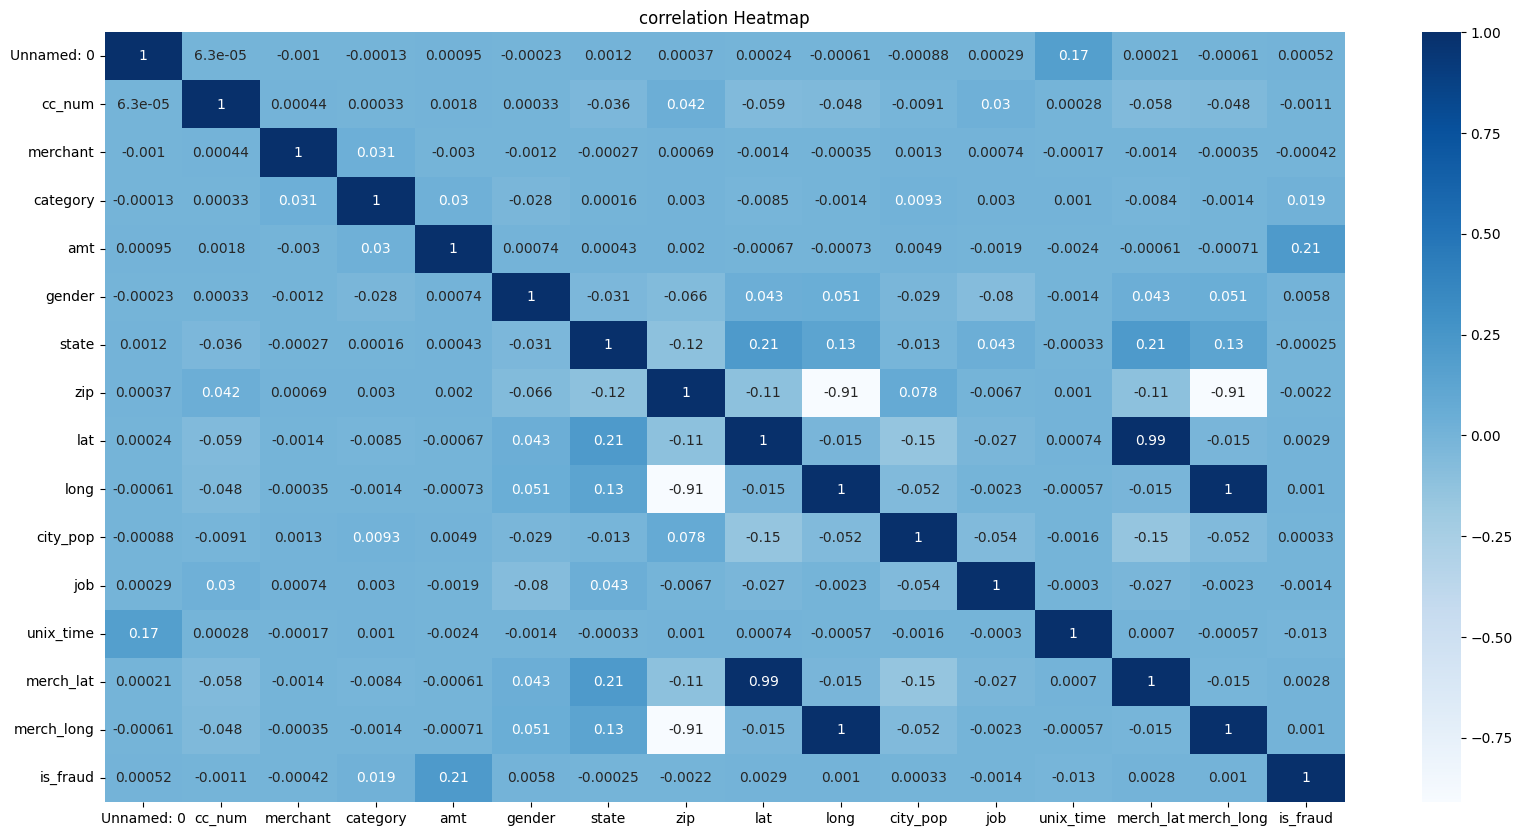

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('correlation Heatmap')
plt.show()